In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.
# On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with 
# an iceberg, killing 1502 out of 2224 passengers and crew.
# This sensational tragedy shocked the international community and led to better 
# safety regulations for ships.One of the reasons that the shipwreck led to such 
# loss of life was that there were not enough lifeboats for the passengers and crew. 
# Although there was some element of luck involved in surviving the sinking, 
# some groups of people such as women, children, and the upper-class 
# were more likely to survive than others.

# VARIABLE DESCRIPTIONS:

# PassengerID     Unique passenger identifier
# Survived        Survival (0 = No; 1 = Yes)
# Pclass          Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd) (Pclass is a proxy for socio-economic status (SES)
#                     1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower)
# Name            Name
# Sex             Sex
# Age             Age (Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5)
# Sibsp           Number of Siblings/Spouses Aboard
# Parch           Number of Parents/Children Aboard
# Ticket          Ticket Number
# Fare            Passenger Fare
# Cabin           Cabin
# Embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



# 1 Set up, data import, inspection and transformation



## 1.1 Set up, data import and inspection



### Import a csv file

In [ ]:
# mount the google drive folder

# note to students reviewing the notebook. this next session imports the titanic.train.csv file from google drive. when
# this block runs you
# will get a link that takes you to your google drive to authorize colab to import the notebook
# click the link and get an auth code and paste the auth code in the box 
# at that point colab can mount google drive and import the csv file. 
# you will need to do this each time your session expires
# also note the path. you will need a folder in the root of your
# google drive called "data_sets" and the csv file needs to be in that folder
# or alternatively you can put the file somewhere else and reference that location


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic = pd.read_csv("/content/drive/MyDrive/data_sets/titanic.train.csv")

### Examine the overall data frame

### info() shows the number of observations, and the number, names, types of columns

In [ ]:
titanic.info() #str(titanic)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###head() shows you the first 5 observations

In [ ]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### You can retrieve and save the number of rows and number of columns of a data frame

In [ ]:
print(titanic.shape[0]) # shape gives you the same information as nrow and ncol the 0th position is rows, the 1st position is columns

rows = titanic.shape[0] # nrow(titanic)
print(rows)

891
891


In [ ]:
col = titanic.shape[1] # ncol(titanic)
col

12

### describe

In [ ]:
titanic.describe(include='all') # similar to summary in R shows the mean, sd and the five-number statistics indicating the spread of each column's values
# missing is the NA count which is a nice feature of summary in R, also missing are the column types. but you do get std deviation.
# not quite as nice as summary which gives multiple counts for character type fields

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Coleridge, Mr. Reginald Charles",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### null values

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### display first few rows or last few

In [ ]:
titanic[400:406]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S


In [ ]:
titanic.head(1) # in R head(titanic, n=1) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
titanic[0:1] #titanic[1,]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
titanic.head(10) #head(titanic, n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.tail(10) # tail(titanic, n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### get help on function

In [ ]:
help(titanic.head) # ?head


Help on method head in module pandas.core.generic:

head(n: int = 5) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
  

## 1.2 Data transformation

### drop columns with no beneficial information for the model

In [ ]:
# Remove unique identifiers from further analysis as they are not interesting without additional feature extractions

# R. titanic <- titanic[c(-1,-4,-9)]

#replace the dataframe with a dropped version of the dataframe
titanic = titanic.drop(['PassengerId','Name','Ticket'],axis=1)

# <- 
# = 


In [ ]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,missing,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,missing,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,missing,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,missing,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,missing,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### numpy handles NA values

In [ ]:
df = pd.DataFrame(data=[1,2,3,4,5,np.NaN,np.NAN],columns=['test'])
print(df)

print(np.std(df.test))
print(np.mean(df.test))

# numpy is perfectly happy to calculate standard deviation with and exclude nulls

   test
0   1.0
1   2.0
2   3.0
3   4.0
4   5.0
5   NaN
6   NaN
1.4142135623730951
3.0


### drop rows with missing values in age

In [ ]:

# Remove observations with missing Age values. 
# This missing data handling approach has the obvious disadvantages of 
# the applicability of the model to data with missing age.
# To keep observations with missing Age values require careful imputation of Age missingness. 
# The various missing data imputation methods are beyond the knowledge required for this tutorial.

# Missing values in Age can cause problems. Test the following commands when you have time.
# var(titanic$Age)
# mean(titanic$Age)
# var(titanic[-which(is.na(titanic$Age)), ]$Age)
# sd(titanic[-which(is.na(titanic$Age)), ]$Age)

# Use which() command to identify and remove observations in which 
# the Age value is missing or is.na(titanic Age) = TRUE.

print(np.std(titanic.Age))

print(titanic.shape[0]) # function(x)  x.function()
titanic = titanic.dropna(subset=['Age']) # base R titanic <- titanic[-which(is.na(titanic$Age)), ]. tidyverse would be %>% filter(!is.na(Age))
print(titanic)

14.516321150817317
891
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
885         0       3  female  39.0      0      5  29.1250   NaN        Q
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[714 rows x 9 columns]


In [ ]:
titanic[titanic['Cabin']=='B96 B98']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
390,1,1,male,36.0,1,2,120.0,B96 B98,S
435,1,1,female,14.0,1,2,120.0,B96 B98,S
763,1,1,female,36.0,1,2,120.0,B96 B98,S
802,1,1,male,11.0,1,2,120.0,B96 B98,S


### count values in columns

In [ ]:
pd.DataFrame(['a','b','a','c','c','c','c','c','c','d','d','d','d',],columns=['letter']).letter.value_counts() # conveniently sorts for you

c    6
d    4
a    2
b    1
Name: letter, dtype: int64

In [ ]:
titanic.Cabin.value_counts() # conveniently sorts for you

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
A31            1
D56            1
E63            1
B82 B84        1
B30            1
Name: Cabin, Length: 134, dtype: int64

In [ ]:


# It is useful to sort the levels based on how many observations contain a factor level.
# Remember table() that counts how many observations contain a factor level.
# Use sort to sort factor levels by the count of observations containing a level
# You can use sort inside barplot()\

#table(titanic$Cabin)

#sort(table(titanic$Cabin), decreasing = TRUE)

#?sort

#barplot(sort(table(titanic$Cabin), decreasing = TRUE))

#barplot(sort(table(titanic$Cabin), decreasing = FALSE))

### barplot of Cabin

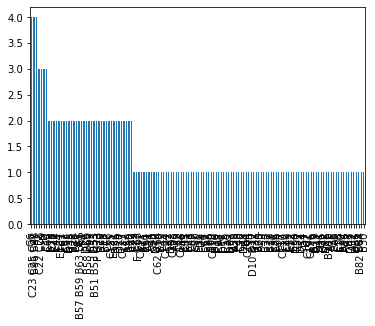

In [ ]:
titanic.Cabin.value_counts(dropna=True).plot(kind='bar')

In [ ]:
titanic[pd.isnull(titanic.Cabin)] #  titanic[titanic['Cabin']=='NaN']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


### replace null with 'missing'

In [ ]:
titanic['Cabin'] = titanic['Cabin'].replace(np.nan, 'missing')

### now show it worked

In [ ]:
titanic.Cabin.value_counts(dropna=False)

missing        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
C103             1
A19              1
E77              1
A20              1
E34              1
Name: Cabin, Length: 148, dtype: int64

### replace null with missing and show it worked 

In [ ]:
titanic['Embarked'] = titanic['Embarked'].replace(np.nan, 'missing')
titanic.Embarked.value_counts(dropna=False)

S          644
C          168
Q           77
missing      2
Name: Embarked, dtype: int64

In [ ]:
titanic[['Age','Sex']].describe(include='all')

,Age,Sex
count,714.000000,714
unique,NaN,2
top,NaN,male
freq,NaN,453
mean,29.699118,NaN
std,14.526497,NaN
min,0.420000,NaN
25%,20.125000,NaN
50%,28.000000,NaN
75%,38.000000,NaN


# 2 Understanding numeric variables

In [ ]:
titanic.Pclass.value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [ ]:
titanic[['Sex','Age']].describe(include='all')

,Sex,Age
count,714,714.000000
unique,2,NaN
top,male,NaN
freq,453,NaN
mean,NaN,29.699118
std,NaN,14.526497
min,NaN,0.420000
25%,NaN,20.125000
50%,NaN,28.000000
75%,NaN,38.000000


### obtain the mean, median, max, min and range of a numeric variable

In [ ]:


print(np.mean(titanic.Age))
print(np.median(titanic.Age))
print(np.min(titanic.Age))
print(np.max(titanic.Age))

29.69911764705882
nan
0.42
80.0


In [ ]:
range_age = np.max(titanic.Age)-np.min(titanic.Age)
print("range of diff: "+str(range_age))

range of diff: 79.58


In [ ]:
# min max normalization of first observation
(titanic.Age[0]-np.min(titanic.Age))/range_age

0.2711736617240513

In [ ]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
titanic.Age.describe(percentiles=[0,0.5,1])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
0%         0.420000
50%       28.000000
100%      80.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
titanic.Age.describe(percentiles=np.linspace(0,1,6))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
0%         0.420000
20%       19.000000
40%       25.000000
50%       28.000000
60%       31.800000
80%       41.000000
100%      80.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
titanic.Age.describe(percentiles=np.linspace(0,1,11))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
0%         0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
100%      80.000000
max       80.000000
Name: Age, dtype: float64

[]

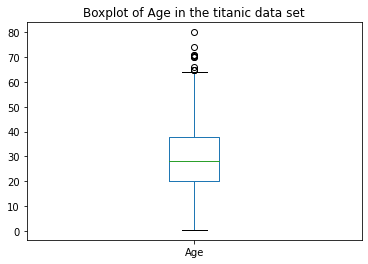

In [ ]:
titanic.Age.plot(kind='box',title='Boxplot of Age in the titanic data set')
plt.plot()

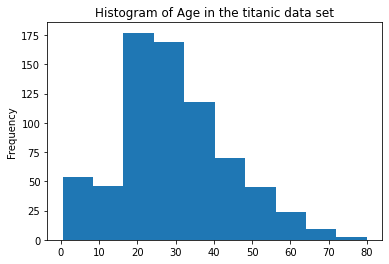

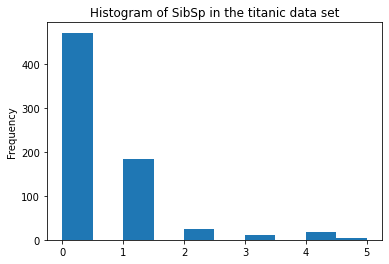

In [ ]:
a = titanic.Age.plot(kind='hist',title='Histogram of Age in the titanic data set')
plt.show()
a = titanic.SibSp.plot(kind='hist',title='Histogram of SibSp in the titanic data set')
plt.show()

count    714.000000
mean       0.512605
std        0.929783
min        0.000000
0%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
100%       5.000000
max        5.000000
Name: SibSp, dtype: float64
count    714.000000
mean       0.512605
std        0.929783
min        0.000000
0%         0.000000
50%        0.000000
100%       5.000000
max        5.000000
Name: SibSp, dtype: float64


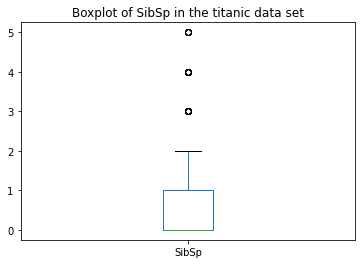

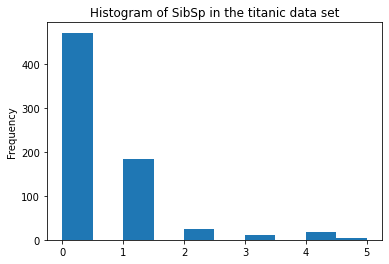

In [ ]:
def num_descriptives(column_name):
  print(titanic[column_name].describe(percentiles=np.linspace(0,1,11)))
  print(titanic[column_name].describe(percentiles=[0,0.5,1]))
  titanic[column_name].plot(kind='box',title='Boxplot of %s in the titanic data set' % (column_name))
  plt.show()
  titanic[column_name].plot(kind='hist',title='Histogram of %s in the titanic data set' % (column_name))
  plt.show()

num_descriptives('SibSp')


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
0%         0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
100%      80.000000
max       80.000000
Name: Age, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
0%         0.420000
50%       28.000000
100%      80.000000
max       80.000000
Name: Age, dtype: float64


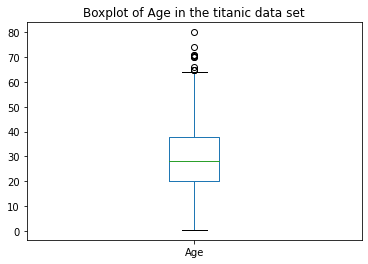

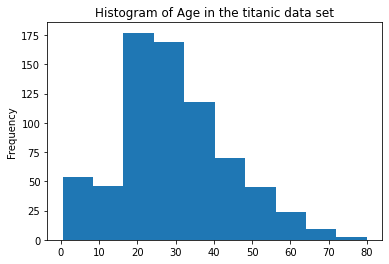

count    714.000000
mean       0.512605
std        0.929783
min        0.000000
0%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
100%       5.000000
max        5.000000
Name: SibSp, dtype: float64
count    714.000000
mean       0.512605
std        0.929783
min        0.000000
0%         0.000000
50%        0.000000
100%       5.000000
max        5.000000
Name: SibSp, dtype: float64


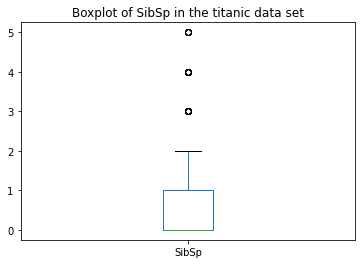

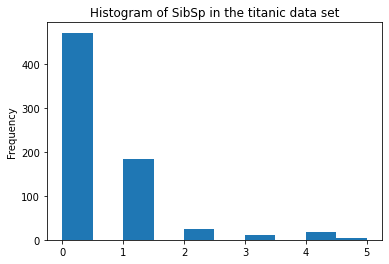

count    714.000000
mean      34.694514
std       52.918930
min        0.000000
0%         0.000000
10%        7.750000
20%        7.913320
30%        9.195030
40%       13.000000
50%       15.741700
60%       26.000000
70%       29.125000
80%       46.900000
90%       79.515000
100%     512.329200
max      512.329200
Name: Fare, dtype: float64
count    714.000000
mean      34.694514
std       52.918930
min        0.000000
0%         0.000000
50%       15.741700
100%     512.329200
max      512.329200
Name: Fare, dtype: float64


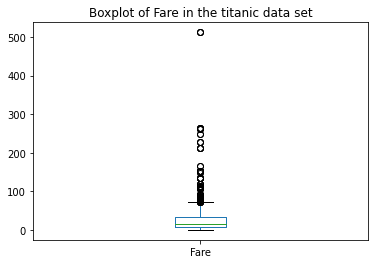

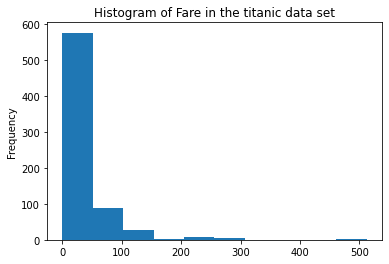

count    714.000000
mean       0.431373
std        0.853289
min        0.000000
0%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        1.000000
90%        2.000000
100%       6.000000
max        6.000000
Name: Parch, dtype: float64
count    714.000000
mean       0.431373
std        0.853289
min        0.000000
0%         0.000000
50%        0.000000
100%       6.000000
max        6.000000
Name: Parch, dtype: float64


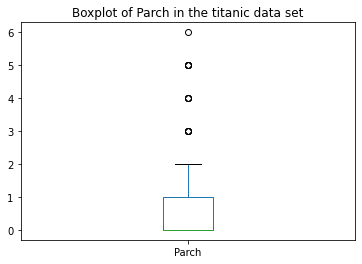

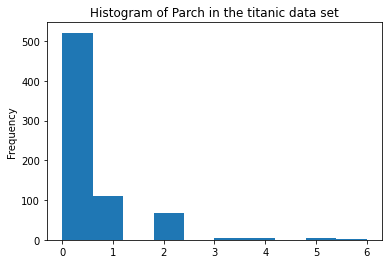

In [ ]:
for column in ['Age','SibSp','Fare','Parch']:
  num_descriptives(column)

# 3 Exploring categorical/factor values

### value counts

In [ ]:
titanic.Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

## barplot

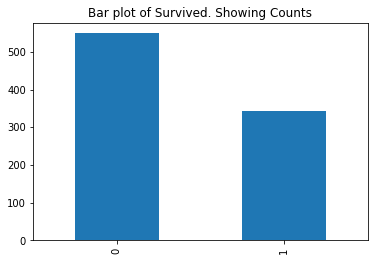

In [ ]:
titanic.Survived.value_counts().plot(kind='bar',title='Bar plot of Survived. Showing Counts')
plt.show()

In [ ]:
round(titanic.value_counts('Survived',normalize=True),ndigits=2)

Survived
0    0.59
1    0.41
dtype: float64

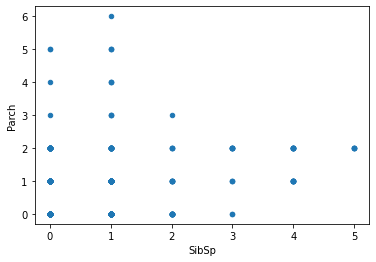

In [ ]:
titanic.plot.scatter('SibSp','Parch')

In [ ]:
titanic[['SibSp','Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
885,0,5
886,0,0
887,0,0
889,0,0


In [ ]:
titanic[['SibSp','Parch']].cov()

,SibSp,Parch
SibSp,0.864497,0.304513
Parch,0.304513,0.728103


In [ ]:
np.std(titanic[['SibSp']])

SibSp    0.929132
dtype: float64

In [ ]:
np.var(titanic[['SibSp']])

SibSp    0.863286
dtype: float64

In [ ]:
np.std(titanic[['Parch']])

Parch    0.852692
dtype: float64

In [ ]:
np.var(titanic[['Parch']])

Parch    0.727083
dtype: float64

# 4 Exploring the relationship of Multiple Variables
ie numeric by categorical, numeric by numeric etc. 

## correlation between numeric variables.

In [ ]:
titanic[['SibSp','Parch']].corr()

,SibSp,Parch
SibSp,1.00000,0.38382
Parch,0.38382,1.00000


In [ ]:
### Generate the correlation matrix of all numeric variables
titanic[['Age','SibSp','Parch','Fare']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.383820,0.138329
Parch,-0.189119,0.383820,1.000000,0.205119
Fare,0.096067,0.138329,0.205119,1.000000


## python equivalent of pairs.panel scatter plot

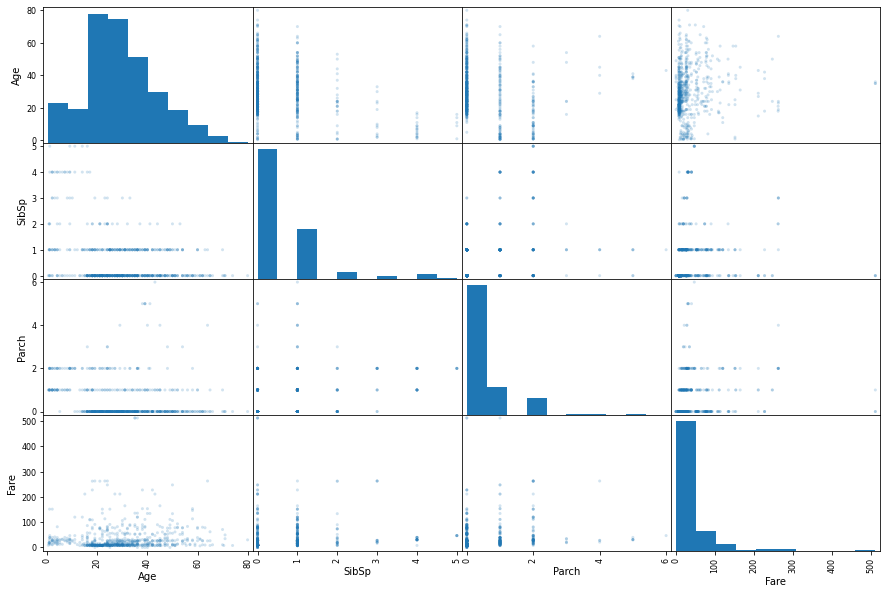

In [ ]:
pd.plotting.scatter_matrix(titanic[['Age','SibSp','Parch','Fare']],figsize=(15, 10),alpha=0.2)
plt.show()

In [ ]:
titanic.drop('Survived',axis=1).corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,-0.554182,0.096067,0.138329,0.205119,1.000000


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Cabin     714 non-null    object 
 8   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 75.8+ KB


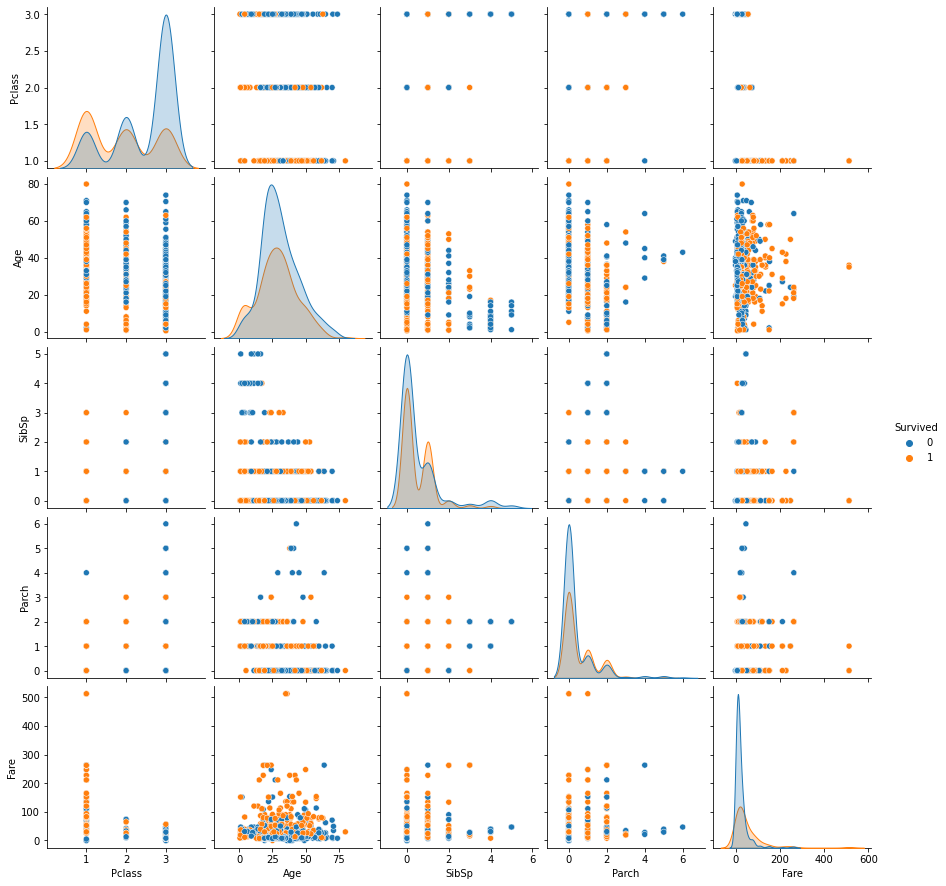

In [ ]:
sns.pairplot(titanic,hue='Survived')

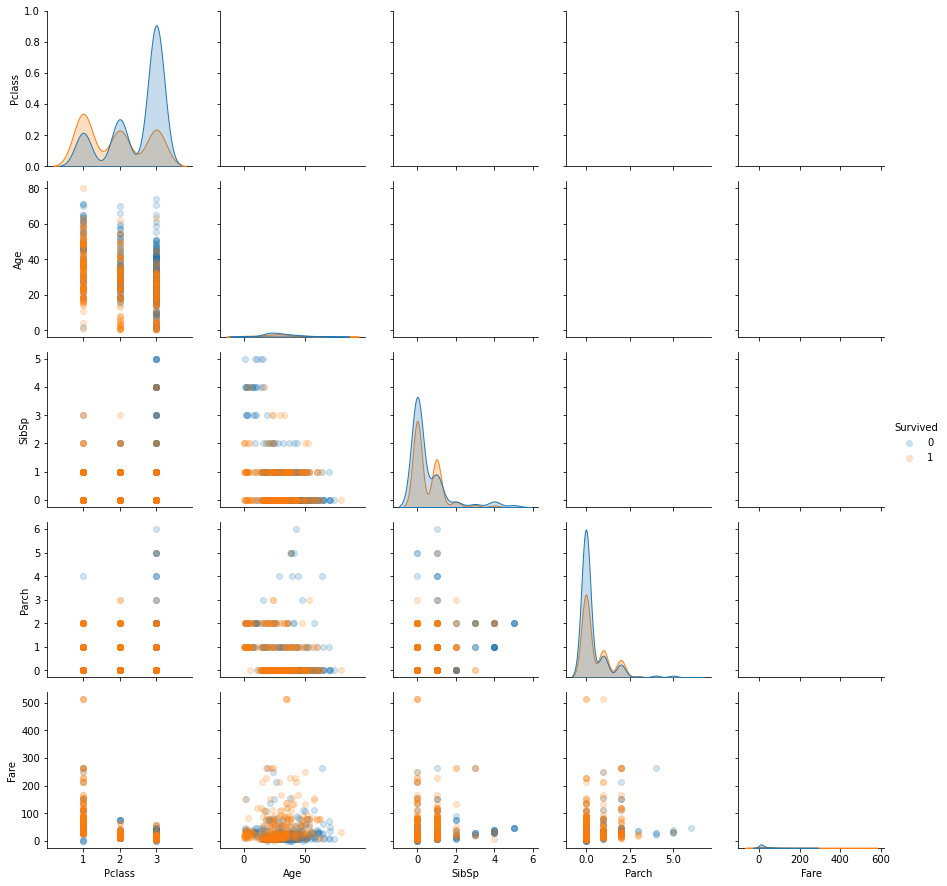

In [ ]:
g = sns.PairGrid(titanic,hue="Survived",hue_kws={"alpha": [0.2,0.2]})
g = g.map_diag(sns.kdeplot,shade=True)
g = g.map_lower(plt.scatter)
#g.hue_kws={"alpha": [0.5,0.5]}
g = g.add_legend()

In [ ]:
titanic.Cabin

0      missing
1          C85
2      missing
3         C123
4      missing
        ...   
885    missing
886    missing
887        B42
889       C148
890    missing
Name: Cabin, Length: 714, dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


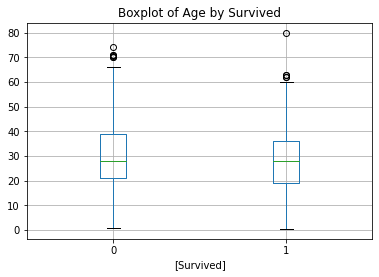

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


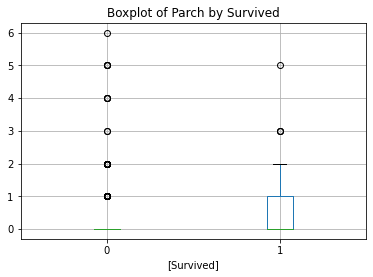

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


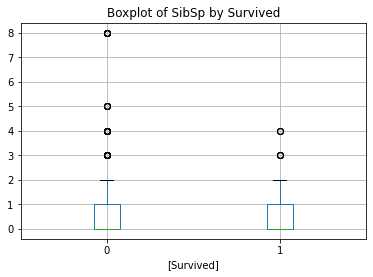

In [ ]:
 titanic.boxplot(column=['Age'],by=['Survived']) # R boxplot(Age~Survived, data = titanic)
 plt.title( 'Boxplot of Age by Survived' )
 plt.suptitle('')
 plt.show()
 
 titanic.boxplot(column=['Parch'],by=['Survived']) # R boxplot(Age~Survived, data = titanic)
 plt.title( 'Boxplot of Parch by Survived' )
 plt.suptitle('')
 plt.show()

titanic.boxplot(column=['SibSp'],by=['Survived']) # R boxplot(Age~Survived, data = titanic)
 plt.title( 'Boxplot of SibSp by Survived' )
 plt.suptitle('')
 plt.show()




In [ ]:
titanic.groupby('Survived')[['SibSp']].agg(['mean','median','min','max',lambda x: np.percentile(x, q = 75)])

SibSp                          
              mean median min max <lambda_0>
Survived                                    
0         0.525943      0   0   5          1
1         0.493103      0   0   4          1

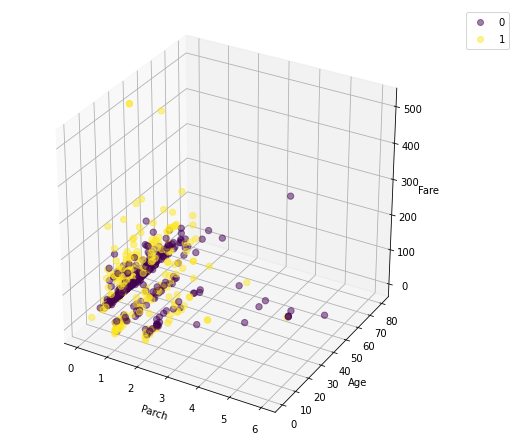

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(titanic.Parch, titanic.Age, titanic.Fare, s=40, c=(titanic.Survived), marker='o', alpha=.5)
ax.set_xlabel('Parch')
ax.set_ylabel('Age')
ax.set_zlabel('Fare')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
# while R can handle Sex as a factor and the value ends up being 0,1 python doesn't automatically
# handle this situation. here I am converting to a numeric to make plotting possible for 3 "numeric" columns

titanic_categorical = titanic.copy()
#titanic_categorical['Sex'] = titanic_categorical['Sex'].astype("category")
#titanic_categorical[titanic_categorical['Sex']=='male'] = 1
titanic_categorical.loc[titanic_categorical['Sex'] == 'female','Female'] = 1
titanic_categorical.loc[titanic_categorical['Sex'] == 'male', 'Female'] = 0


In [ ]:
titanic_categorical

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Female
0,0,3,male,22.0,1,0,7.2500,missing,S,0.0
1,1,1,female,38.0,1,0,71.2833,C85,C,1.0
2,1,3,female,26.0,0,0,7.9250,missing,S,1.0
3,1,1,female,35.0,1,0,53.1000,C123,S,1.0
4,0,3,male,35.0,0,0,8.0500,missing,S,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,missing,S,0.0
887,1,1,female,19.0,0,0,30.0000,B42,S,1.0
888,0,3,female,NaN,1,2,23.4500,missing,S,1.0
889,1,1,male,26.0,0,0,30.0000,C148,C,0.0


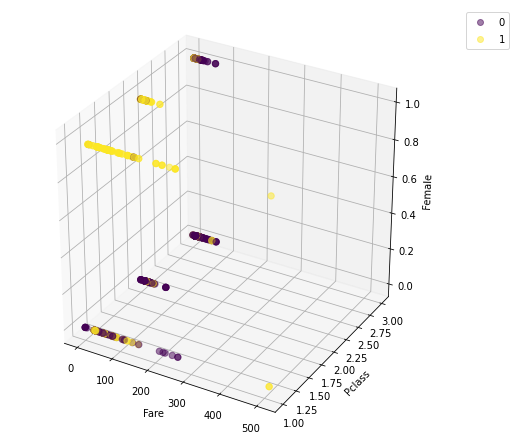

In [ ]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(titanic_categorical.Fare, titanic_categorical.Pclass, titanic_categorical.Female, s=40, c=(titanic_categorical.Survived), marker='o', alpha=.5)
ax.set_xlabel('Fare')
ax.set_ylabel('Pclass')
ax.set_zlabel('Female')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)